In [6]:

import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dropout,Conv2D
from sklearn.model_selection import train_test_split
import csv
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
main = pd.read_csv('dataset/main.csv')
home = pd.read_csv('dataset/main.csv',usecols=['Team'])
away = pd.read_csv('dataset/main.csv',usecols=['Opponent']).values
ha = pd.read_csv('dataset/main.csv',usecols=['Home']).values

home = encoder.fit_transform(home)
away = encoder.fit_transform(away)
homeaway = encoder.fit_transform(ha)

new = np.append(home,away,axis=1)
# new2 = pd.read_csv('dataset/nba.games.stats - nba_prev.csv',usecols=['FieldGoals','FieldGoalsAttempted','FieldGoals.','X3PointShots','X3PointShotsAttempted','X3PointShots.','FreeThrows','FreeThrowsAttempted','FreeThrows.','OffRebounds','TotalRebounds','Assists','Steals','Blocks','Turnovers','TotalFouls',
#                         'Opp.FieldGoals', 'Opp.3PointShotsAttempted', 'Opp.3PointShots.', 'Opp.FreeThrows', 
#                         'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds', 
#                         'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls',
#                         'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots']).values

# new2 = pd.read_csv('dataset/main_prev.csv',usecols=['FieldGoalsAttempted','FreeThrows','FreeThrowsAttempted','FreeThrows.','OffRebounds','TotalRebounds','Assists','Steals','Blocks','Turnovers','TotalFouls',
#                         'Opp.FreeThrows', 
#                         'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds', 
#                         'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls',
#                         'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots']).values

statistics = pd.read_csv('dataset/main.csv')
# print(statistics)
new2 = statistics[['FieldGoalsAttempted','FreeThrows','FreeThrowsAttempted','FreeThrows.','OffRebounds','TotalRebounds','Assists','Steals','Blocks','Turnovers','TotalFouls',
                        'Opp.FreeThrows', 
                        'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds', 
                        'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls',
                        'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots']].values
# print(new2[0])
new3 = np.append(new,homeaway,axis=1)
new2 = np.append(new3,new2,axis=1)
winLoss =  pd.read_csv('dataset/main.csv',usecols=['WINorLOSS']).values
winLoss = encoder.fit_transform(winLoss)
points = pd.read_csv('dataset/main.csv',usecols=['TeamPoints','OpponentPoints']).values
points = np.append(points,winLoss,axis=1)
# points.shape
# points = winLoss
X_train, X_test, y_train, y_test = train_test_split(new2, points, test_size=20)
# X_train = new2
# y_train = winLoss
#MODEL
model = Sequential()
keras.optimizers.adam(lr=0.1)
model.add(Dense(30, activation='relu',input_dim=85))
model.add(Dropout(0.30))
# model.add(Dense(46, activation='relu'))
# model.add(Dense(30, activation='sigmoid'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))

# model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation = 'relu'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(np.asarray(X_train),np.asarray(y_train), epochs=40)
# print(model.evaluate(X_test,y_test))

predict = np.asarray([new2[674]])


Epoch 1/40
9820/9820 [==============================] - 1s 127us/step - loss: 526.3847 - acc: 0.4906
Epoch 2/40
9820/9820 [==============================] - 1s 61us/step - loss: 138.8553 - acc: 0.4943
Epoch 3/40
9820/9820 [==============================] - 1s 66us/step - loss: 98.6563 - acc: 0.5223
Epoch 4/40
9820/9820 [==============================] - 1s 65us/step - loss: 78.2131 - acc: 0.5382
Epoch 5/40
9820/9820 [==============================] - 1s 70us/step - loss: 70.0339 - acc: 0.5705
Epoch 6/40
9820/9820 [==============================] - 1s 78us/step - loss: 61.2376 - acc: 0.5986
Epoch 7/40
9820/9820 [==============================] - 1s 64us/step - loss: 55.2356 - acc: 0.6443
Epoch 8/40
9820/9820 [==============================] - 1s 64us/step - loss: 49.6730 - acc: 0.6897
Epoch 9/40
9820/9820 [==============================] - 1s 66us/step - loss: 43.1127 - acc: 0.7395
Epoch 10/40
9820/9820 [==============================] - 1s 61us/step - loss: 37.3064 - acc: 0.7701
Epoch 

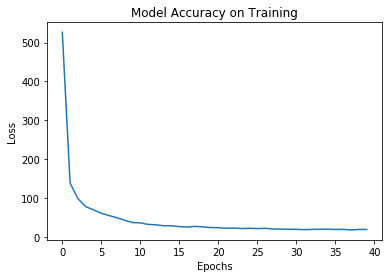

In [9]:
plt.plot(history.history['loss'])
plt.title('Model Accuracy on Training')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [93]:
main


,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1690,ATL,16,2017-11-18,Home,BOS,L,99,110,37,...,16,20,0.800,9,41,21,9,6,15,22
1,1791,BOS,17,2017-11-18,Away,ATL,W,110,99,39,...,16,20,0.800,6,35,24,7,1,13,19
2,1593,CHO,15,2017-11-18,Home,LAC,W,102,87,34,...,13,19,0.684,7,44,18,5,6,14,22
3,1796,DAL,17,2017-11-18,Home,MIL,W,111,79,38,...,17,31,0.548,8,38,13,8,5,12,25
4,1699,GSW,16,2017-11-18,Away,PHI,W,124,116,50,...,12,16,0.750,11,40,28,8,5,11,22
5,17100,HOU,17,2017-11-18,Away,MEM,W,105,83,35,...,14,19,0.737,15,48,18,6,7,12,18
6,15102,LAC,15,2017-11-18,Away,CHO,L,87,102,33,...,23,29,0.793,8,49,20,7,9,8,16
7,15104,MEM,15,2017-11-18,Home,HOU,L,83,105,31,...,17,21,0.810,9,45,21,8,9,16,24
8,15106,MIL,15,2017-11-18,Away,DAL,L,79,111,28,...,16,19,0.842,7,49,27,7,2,16,26
9,16111,ORL,16,2017-11-18,Home,UTA,L,85,125,31,...,17,18,0.944,14,54,31,10,4,10,19


In [3]:
teams = pd.read_csv('dataset/nba.games.stats - nba_prev.csv')
print(teams.loc[teams['Team']=='PHI'])

      Unnamed: 0 Team  Game        Date  Home Opponent WINorLOSS  TeamPoints  \
10         15112  PHI    15  2017-11-18  Home      GSW         L         116   
55         14112  PHI    14  2017-11-15  Away      LAL         W         115   
80         13115  PHI    13  2017-11-13  Away      LAC         W         109   
110        12128  PHI    12  2017-11-11  Away      GSW         L         114   
138        11151  PHI    11  2017-11-09  Away      SAC         L         108   
165        10112  PHI    10  2017-11-07  Away      UTA         W         104   
226         9112  PHI     9  2017-11-03  Home      IND         W         121   
253         8307  PHI     8  2017-11-01  Home      ATL         W         119   
281         7504  PHI     7  2017-10-30  Away      HOU         W         115   
312         6504  PHI     6  2017-10-28  Away      DAL         W         112   
354         5504  PHI     5  2017-10-25  Home      HOU         L         104   
382         4504  PHI     4  2017-10-23 

2086/2086 [==============================] - 0s 24us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                2580      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 3,626
Trainable params: 3,626
Non-trainable params: 0
_________________________________________________________________
[ 0.     0.     0.     0.     1.     0.     0.     0.     0.     0.
  0.     0.   

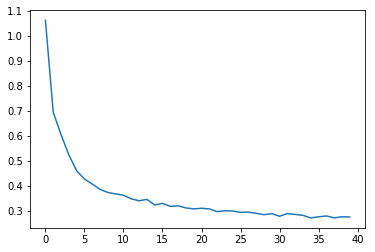

[0.2859414161423137, 0.8815915627996165]

In [6]:


home = pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['Team'])
away = pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['Opponent']).values
# print("HOME: ", home[5],"AWAY: ", away[5])
ha = pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['Home']).values
home = encoder.fit_transform(home)
away = encoder.fit_transform(away)
homeaway = encoder.fit_transform(ha)



new = np.append(home,away,axis=1)
new2 = pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['FieldGoalsAttempted','FreeThrows','FreeThrowsAttempted','FreeThrows.','OffRebounds','TotalRebounds','Assists','Steals','Blocks','Turnovers','TotalFouls',
                        'Opp.FreeThrows', 
                        'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds', 
                        'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls',
                        'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots']).values




new3 = np.append(new,homeaway,axis=1)
new2 = np.append(new3,new2,axis=1)
winLoss =  pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['WINorLOSS']).values
winLoss = encoder.fit_transform(winLoss)
points = pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['TeamPoints','OpponentPoints']).values
points = np.append(points,winLoss,axis=1)
# points.shape
# points = winLoss
# X_train, X_test, y_train, y_test = train_test_split(new2, points, test_size=0.40)
scores = model.evaluate(new2,winLoss)
model.summary()
model.predict(predict)
# print(scores)

# predict = np.asarray([new2[5]])
# hello = model.predict(predict)
# print(hello[0][0], "-",hello[0][1])
print(new2[5])
predict = np.asarray([new2[6]])
print(model.predict(predict))
plt.plot(history.history['loss'])
plt.show()
scores

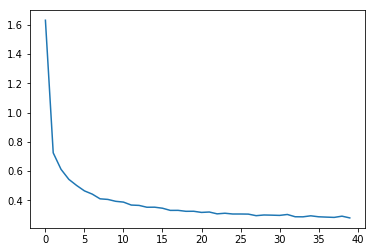

NameError: name 'scores' is not defined

In [197]:
plt.plot(history.history['loss'])
plt.show()
scores

In [21]:
winLoss =  pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['WINorLOSS']).values
for i in range(0,len(new2)):
    predict = np.asarray([new2[i]])
    hello = model.predict(predict)
    if(hello>0.5):
       print("Game No: ",i,"Prediction: W"," Actual: ",winLoss[i])
       
    else:
        print("Game No: ",i,"Prediction: L"," Actual: ",winLoss[i])


Game No:  0 Prediction: L  Actual:  ['L']
Game No:  1 Prediction: L  Actual:  ['W']
Game No:  2 Prediction: L  Actual:  ['L']
Game No:  3 Prediction: W  Actual:  ['W']
Game No:  4 Prediction: L  Actual:  ['L']
Game No:  5 Prediction: W  Actual:  ['L']
Game No:  6 Prediction: L  Actual:  ['L']
Game No:  7 Prediction: W  Actual:  ['W']
Game No:  8 Prediction: L  Actual:  ['L']
Game No:  9 Prediction: L  Actual:  ['L']
Game No:  10 Prediction: L  Actual:  ['L']
Game No:  11 Prediction: W  Actual:  ['W']
Game No:  12 Prediction: W  Actual:  ['W']
Game No:  13 Prediction: W  Actual:  ['W']
Game No:  14 Prediction: W  Actual:  ['W']
Game No:  15 Prediction: W  Actual:  ['W']
Game No:  16 Prediction: L  Actual:  ['L']
Game No:  17 Prediction: W  Actual:  ['W']
Game No:  18 Prediction: L  Actual:  ['L']
Game No:  19 Prediction: W  Actual:  ['W']
Game No:  20 Prediction: L  Actual:  ['L']
Game No:  21 Prediction: L  Actual:  ['L']
Game No:  22 Prediction: L  Actual:  ['L']
Game No:  23 Predicti

Game No:  280 Prediction: W  Actual:  ['W']
Game No:  281 Prediction: L  Actual:  ['L']
Game No:  282 Prediction: W  Actual:  ['W']
Game No:  283 Prediction: L  Actual:  ['L']
Game No:  284 Prediction: W  Actual:  ['W']
Game No:  285 Prediction: L  Actual:  ['L']
Game No:  286 Prediction: L  Actual:  ['L']
Game No:  287 Prediction: L  Actual:  ['L']
Game No:  288 Prediction: L  Actual:  ['L']
Game No:  289 Prediction: L  Actual:  ['L']
Game No:  290 Prediction: W  Actual:  ['W']
Game No:  291 Prediction: W  Actual:  ['W']
Game No:  292 Prediction: W  Actual:  ['W']
Game No:  293 Prediction: W  Actual:  ['W']
Game No:  294 Prediction: L  Actual:  ['L']
Game No:  295 Prediction: L  Actual:  ['L']
Game No:  296 Prediction: W  Actual:  ['W']
Game No:  297 Prediction: L  Actual:  ['L']
Game No:  298 Prediction: W  Actual:  ['W']
Game No:  299 Prediction: L  Actual:  ['L']
Game No:  300 Prediction: L  Actual:  ['L']
Game No:  301 Prediction: W  Actual:  ['W']
Game No:  302 Prediction: W  Act

Game No:  535 Prediction: L  Actual:  ['L']
Game No:  536 Prediction: W  Actual:  ['W']
Game No:  537 Prediction: L  Actual:  ['L']
Game No:  538 Prediction: L  Actual:  ['L']
Game No:  539 Prediction: L  Actual:  ['L']
Game No:  540 Prediction: W  Actual:  ['W']
Game No:  541 Prediction: L  Actual:  ['L']
Game No:  542 Prediction: W  Actual:  ['W']
Game No:  543 Prediction: L  Actual:  ['L']
Game No:  544 Prediction: L  Actual:  ['L']
Game No:  545 Prediction: L  Actual:  ['L']
Game No:  546 Prediction: L  Actual:  ['L']
Game No:  547 Prediction: W  Actual:  ['W']
Game No:  548 Prediction: L  Actual:  ['L']
Game No:  549 Prediction: L  Actual:  ['L']
Game No:  550 Prediction: L  Actual:  ['L']
Game No:  551 Prediction: W  Actual:  ['W']
Game No:  552 Prediction: L  Actual:  ['L']
Game No:  553 Prediction: L  Actual:  ['L']
Game No:  554 Prediction: L  Actual:  ['L']
Game No:  555 Prediction: W  Actual:  ['W']
Game No:  556 Prediction: W  Actual:  ['W']
Game No:  557 Prediction: L  Act

Game No:  735 Prediction: L  Actual:  ['L']
Game No:  736 Prediction: W  Actual:  ['W']
Game No:  737 Prediction: L  Actual:  ['L']
Game No:  738 Prediction: W  Actual:  ['W']
Game No:  739 Prediction: W  Actual:  ['L']
Game No:  740 Prediction: W  Actual:  ['W']
Game No:  741 Prediction: L  Actual:  ['L']
Game No:  742 Prediction: W  Actual:  ['W']
Game No:  743 Prediction: W  Actual:  ['W']
Game No:  744 Prediction: L  Actual:  ['L']
Game No:  745 Prediction: L  Actual:  ['L']
Game No:  746 Prediction: L  Actual:  ['L']
Game No:  747 Prediction: L  Actual:  ['L']
Game No:  748 Prediction: W  Actual:  ['W']
Game No:  749 Prediction: L  Actual:  ['L']
Game No:  750 Prediction: W  Actual:  ['W']
Game No:  751 Prediction: L  Actual:  ['L']
Game No:  752 Prediction: L  Actual:  ['L']
Game No:  753 Prediction: L  Actual:  ['W']
Game No:  754 Prediction: W  Actual:  ['W']
Game No:  755 Prediction: W  Actual:  ['W']
Game No:  756 Prediction: W  Actual:  ['W']
Game No:  757 Prediction: W  Act

Game No:  979 Prediction: L  Actual:  ['W']
Game No:  980 Prediction: L  Actual:  ['L']
Game No:  981 Prediction: L  Actual:  ['L']
Game No:  982 Prediction: W  Actual:  ['W']
Game No:  983 Prediction: W  Actual:  ['L']
Game No:  984 Prediction: L  Actual:  ['L']
Game No:  985 Prediction: L  Actual:  ['L']
Game No:  986 Prediction: W  Actual:  ['W']
Game No:  987 Prediction: W  Actual:  ['W']
Game No:  988 Prediction: W  Actual:  ['L']
Game No:  989 Prediction: W  Actual:  ['L']
Game No:  990 Prediction: W  Actual:  ['W']
Game No:  991 Prediction: W  Actual:  ['W']
Game No:  992 Prediction: L  Actual:  ['L']
Game No:  993 Prediction: W  Actual:  ['W']
Game No:  994 Prediction: L  Actual:  ['L']
Game No:  995 Prediction: W  Actual:  ['W']
Game No:  996 Prediction: W  Actual:  ['W']
Game No:  997 Prediction: W  Actual:  ['W']
Game No:  998 Prediction: L  Actual:  ['L']
Game No:  999 Prediction: W  Actual:  ['W']
Game No:  1000 Prediction: L  Actual:  ['L']
Game No:  1001 Prediction: W  A

Game No:  1168 Prediction: L  Actual:  ['L']
Game No:  1169 Prediction: L  Actual:  ['L']
Game No:  1170 Prediction: L  Actual:  ['L']
Game No:  1171 Prediction: W  Actual:  ['W']
Game No:  1172 Prediction: L  Actual:  ['L']
Game No:  1173 Prediction: W  Actual:  ['L']
Game No:  1174 Prediction: L  Actual:  ['L']
Game No:  1175 Prediction: W  Actual:  ['L']
Game No:  1176 Prediction: L  Actual:  ['L']
Game No:  1177 Prediction: W  Actual:  ['W']
Game No:  1178 Prediction: L  Actual:  ['L']
Game No:  1179 Prediction: W  Actual:  ['L']
Game No:  1180 Prediction: W  Actual:  ['W']
Game No:  1181 Prediction: L  Actual:  ['W']
Game No:  1182 Prediction: W  Actual:  ['W']
Game No:  1183 Prediction: W  Actual:  ['W']
Game No:  1184 Prediction: W  Actual:  ['L']
Game No:  1185 Prediction: W  Actual:  ['W']
Game No:  1186 Prediction: W  Actual:  ['W']
Game No:  1187 Prediction: L  Actual:  ['L']
Game No:  1188 Prediction: L  Actual:  ['L']
Game No:  1189 Prediction: L  Actual:  ['L']
Game No:  

Game No:  1359 Prediction: L  Actual:  ['L']
Game No:  1360 Prediction: W  Actual:  ['L']
Game No:  1361 Prediction: W  Actual:  ['W']
Game No:  1362 Prediction: W  Actual:  ['W']
Game No:  1363 Prediction: W  Actual:  ['W']
Game No:  1364 Prediction: L  Actual:  ['L']
Game No:  1365 Prediction: L  Actual:  ['L']
Game No:  1366 Prediction: W  Actual:  ['W']
Game No:  1367 Prediction: L  Actual:  ['W']
Game No:  1368 Prediction: W  Actual:  ['W']
Game No:  1369 Prediction: L  Actual:  ['L']
Game No:  1370 Prediction: W  Actual:  ['W']
Game No:  1371 Prediction: W  Actual:  ['W']
Game No:  1372 Prediction: L  Actual:  ['L']
Game No:  1373 Prediction: L  Actual:  ['W']
Game No:  1374 Prediction: L  Actual:  ['L']
Game No:  1375 Prediction: W  Actual:  ['W']
Game No:  1376 Prediction: L  Actual:  ['L']
Game No:  1377 Prediction: L  Actual:  ['L']
Game No:  1378 Prediction: L  Actual:  ['L']
Game No:  1379 Prediction: L  Actual:  ['L']
Game No:  1380 Prediction: W  Actual:  ['W']
Game No:  

Game No:  1603 Prediction: W  Actual:  ['W']
Game No:  1604 Prediction: W  Actual:  ['W']
Game No:  1605 Prediction: W  Actual:  ['W']
Game No:  1606 Prediction: L  Actual:  ['L']
Game No:  1607 Prediction: W  Actual:  ['W']
Game No:  1608 Prediction: W  Actual:  ['W']
Game No:  1609 Prediction: L  Actual:  ['L']
Game No:  1610 Prediction: W  Actual:  ['W']
Game No:  1611 Prediction: L  Actual:  ['L']
Game No:  1612 Prediction: W  Actual:  ['W']
Game No:  1613 Prediction: L  Actual:  ['W']
Game No:  1614 Prediction: L  Actual:  ['L']
Game No:  1615 Prediction: L  Actual:  ['L']
Game No:  1616 Prediction: L  Actual:  ['L']
Game No:  1617 Prediction: W  Actual:  ['W']
Game No:  1618 Prediction: W  Actual:  ['L']
Game No:  1619 Prediction: W  Actual:  ['W']
Game No:  1620 Prediction: L  Actual:  ['L']
Game No:  1621 Prediction: W  Actual:  ['W']
Game No:  1622 Prediction: W  Actual:  ['W']
Game No:  1623 Prediction: L  Actual:  ['L']
Game No:  1624 Prediction: W  Actual:  ['W']
Game No:  

Game No:  1810 Prediction: W  Actual:  ['W']
Game No:  1811 Prediction: L  Actual:  ['L']
Game No:  1812 Prediction: W  Actual:  ['W']
Game No:  1813 Prediction: W  Actual:  ['W']
Game No:  1814 Prediction: W  Actual:  ['W']
Game No:  1815 Prediction: L  Actual:  ['L']
Game No:  1816 Prediction: W  Actual:  ['W']
Game No:  1817 Prediction: W  Actual:  ['W']
Game No:  1818 Prediction: W  Actual:  ['W']
Game No:  1819 Prediction: W  Actual:  ['W']
Game No:  1820 Prediction: W  Actual:  ['W']
Game No:  1821 Prediction: L  Actual:  ['L']
Game No:  1822 Prediction: L  Actual:  ['L']
Game No:  1823 Prediction: W  Actual:  ['W']
Game No:  1824 Prediction: L  Actual:  ['L']
Game No:  1825 Prediction: L  Actual:  ['L']
Game No:  1826 Prediction: W  Actual:  ['W']
Game No:  1827 Prediction: L  Actual:  ['L']
Game No:  1828 Prediction: L  Actual:  ['W']
Game No:  1829 Prediction: W  Actual:  ['W']
Game No:  1830 Prediction: W  Actual:  ['W']
Game No:  1831 Prediction: L  Actual:  ['L']
Game No:  

Game No:  2003 Prediction: L  Actual:  ['L']
Game No:  2004 Prediction: L  Actual:  ['L']
Game No:  2005 Prediction: W  Actual:  ['L']
Game No:  2006 Prediction: W  Actual:  ['W']
Game No:  2007 Prediction: L  Actual:  ['L']
Game No:  2008 Prediction: L  Actual:  ['L']
Game No:  2009 Prediction: W  Actual:  ['W']
Game No:  2010 Prediction: W  Actual:  ['W']
Game No:  2011 Prediction: L  Actual:  ['L']
Game No:  2012 Prediction: L  Actual:  ['L']
Game No:  2013 Prediction: W  Actual:  ['W']
Game No:  2014 Prediction: W  Actual:  ['W']
Game No:  2015 Prediction: L  Actual:  ['L']
Game No:  2016 Prediction: L  Actual:  ['L']
Game No:  2017 Prediction: L  Actual:  ['L']
Game No:  2018 Prediction: W  Actual:  ['W']
Game No:  2019 Prediction: W  Actual:  ['W']
Game No:  2020 Prediction: L  Actual:  ['L']
Game No:  2021 Prediction: W  Actual:  ['L']
Game No:  2022 Prediction: L  Actual:  ['L']
Game No:  2023 Prediction: L  Actual:  ['L']
Game No:  2024 Prediction: L  Actual:  ['L']
Game No:  

In [ ]:
home = pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['Team'])
away = pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['Opponent'])
MAIN = pd.read_csv('dataset/nba.games.stats - nba_prev.csv')

In [ ]:
home['Team'][7]

In [9]:
away['Opponent'][7]

'HOU'

In [40]:
predict = np.asarray([new2[220]])
print((model.predict(predict)))
now = model.predict(predict)
if(now>0.5):
    print('1')
else:
    print('0')

[[0.5086734]]
1


In [11]:
new2[41]

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   , 95.   ,  9.   , 14.   ,
        0.643, 16.   , 49.   , 33.   ,  7.   ,  3.   , 18.   , 20.   ,
       86.   ,  0.5  , 15.   , 20.   , 25.   ,  0.8  ,  8.   , 39.   ,
       32.   , 10.   ,  5.   , 14.   , 16.   ])

In [12]:
print(home.loc[home['Team']=='PHI'])

    Team
16   PHI
72   PHI
98   PHI
115  PHI
141  PHI
188  PHI
215  PHI
242  PHI
260  PHI
287  PHI
310  PHI
357  PHI


In [83]:
MAIN

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1690,ATL,16,2017-11-18,Home,BOS,L,99,110,37,...,16,20,0.800,9,41,21,9,6,15,22
1,1791,BOS,17,2017-11-18,Away,ATL,W,110,99,39,...,16,20,0.800,6,35,24,7,1,13,19
2,1593,CHO,15,2017-11-18,Home,LAC,W,102,87,34,...,13,19,0.684,7,44,18,5,6,14,22
3,1796,DAL,17,2017-11-18,Home,MIL,W,111,79,38,...,17,31,0.548,8,38,13,8,5,12,25
4,1699,GSW,16,2017-11-18,Away,PHI,W,124,116,50,...,12,16,0.750,11,40,28,8,5,11,22
5,17100,HOU,17,2017-11-18,Away,MEM,W,105,83,35,...,14,19,0.737,15,48,18,6,7,12,18
6,15102,LAC,15,2017-11-18,Away,CHO,L,87,102,33,...,23,29,0.793,8,49,20,7,9,8,16
7,15104,MEM,15,2017-11-18,Home,HOU,L,83,105,31,...,17,21,0.810,9,45,21,8,9,16,24
8,15106,MIL,15,2017-11-18,Away,DAL,L,79,111,28,...,16,19,0.842,7,49,27,7,2,16,26
9,16111,ORL,16,2017-11-18,Home,UTA,L,85,125,31,...,17,18,0.944,14,54,31,10,4,10,19


In [84]:
print(MAIN.loc[MAIN['Team']=='PHI'])

      Unnamed: 0 Team  Game        Date  Home Opponent WINorLOSS  TeamPoints  \
10         15112  PHI    15  2017-11-18  Home      GSW         L         116   
55         14112  PHI    14  2017-11-15  Away      LAL         W         115   
80         13115  PHI    13  2017-11-13  Away      LAC         W         109   
110        12128  PHI    12  2017-11-11  Away      GSW         L         114   
138        11151  PHI    11  2017-11-09  Away      SAC         L         108   
165        10112  PHI    10  2017-11-07  Away      UTA         W         104   
226         9112  PHI     9  2017-11-03  Home      IND         W         121   
253         8307  PHI     8  2017-11-01  Home      ATL         W         119   
281         7504  PHI     7  2017-10-30  Away      HOU         W         115   
312         6504  PHI     6  2017-10-28  Away      DAL         W         112   
354         5504  PHI     5  2017-10-25  Home      HOU         L         104   
382         4504  PHI     4  2017-10-23 

In [13]:
import tensorflow as tf

In [14]:
home = encoder.fit_transform(home)


In [19]:
index = tf.argmax(home[1], axis=1)

In [24]:
home[5][1]

0

In [7]:
scores

[0.2724839868962927, 0.888283378746594]

In [22]:
mainTest = pd.read_csv('dataset/main_2018.csv')
home = pd.read_csv('dataset/main_2018.csv',usecols=['Team'])
away = pd.read_csv('dataset/main_2018.csv',usecols=['Opponent']).values
ha = pd.read_csv('dataset/main_2018.csv',usecols=['Home']).values
home = encoder.fit_transform(home)
away = encoder.fit_transform(away)
homeaway = encoder.fit_transform(ha)

testTeamCol = np.append(home,away,axis=1)
finalStats = pd.read_csv('dataset/main_2018.csv',usecols=['FieldGoalsAttempted','FreeThrows','FreeThrowsAttempted','FreeThrows.','OffRebounds','TotalRebounds','Assists','Steals','Blocks','Turnovers','TotalFouls',
                        'Opp.FreeThrows', 
                        'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds', 
                        'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls',
                        'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots']).values

testTeam = np.append(testTeamCol,homeaway,axis=1)
finalStats = np.append(testTeam,finalStats,axis=1)
winLoss =  pd.read_csv('dataset/main_2018.csv',usecols=['WINorLOSS']).values
winLoss = encoder.fit_transform(winLoss)
points = pd.read_csv('dataset/main_2018.csv',usecols=['TeamPoints','OpponentPoints']).values
points = np.append(points,winLoss,axis=1)




In [23]:
print(model.evaluate(finalStats,winLoss))
winLoss =  pd.read_csv('dataset/main_2018.csv',usecols=['WINorLOSS']).values
# winLoss = encoder.fit_transform(winLoss)

for i in range(0,len(new2)):
    predict = np.asarray([finalStats[i]])
    hello = model.predict(predict)
    if(hello>0.5):
       print("Game No: ",i,"Prediction: W"," Actual: ",winLoss[i])
       
    else:
        print("Game No: ",i,"Prediction: L"," Actual: ",winLoss[i])



2086/2086 [==============================] - 0s 114us/step
[0.3105470838734196, 0.8696069031639502]
Game No:  0 Prediction: L  Actual:  ['L']
Game No:  1 Prediction: L  Actual:  ['W']
Game No:  2 Prediction: L  Actual:  ['L']
Game No:  3 Prediction: W  Actual:  ['W']
Game No:  4 Prediction: L  Actual:  ['L']
Game No:  5 Prediction: L  Actual:  ['L']
Game No:  6 Prediction: L  Actual:  ['L']
Game No:  7 Prediction: L  Actual:  ['W']
Game No:  8 Prediction: L  Actual:  ['L']
Game No:  9 Prediction: L  Actual:  ['L']
Game No:  10 Prediction: L  Actual:  ['L']
Game No:  11 Prediction: W  Actual:  ['W']
Game No:  12 Prediction: W  Actual:  ['W']
Game No:  13 Prediction: W  Actual:  ['W']
Game No:  14 Prediction: W  Actual:  ['W']
Game No:  15 Prediction: W  Actual:  ['W']
Game No:  16 Prediction: L  Actual:  ['L']
Game No:  17 Prediction: W  Actual:  ['W']
Game No:  18 Prediction: L  Actual:  ['L']
Game No:  19 Prediction: W  Actual:  ['W']
Game No:  20 Prediction: L  Actual:  ['L']
Game No

Game No:  261 Prediction: W  Actual:  ['L']
Game No:  262 Prediction: W  Actual:  ['W']
Game No:  263 Prediction: L  Actual:  ['L']
Game No:  264 Prediction: W  Actual:  ['L']
Game No:  265 Prediction: L  Actual:  ['W']
Game No:  266 Prediction: W  Actual:  ['W']
Game No:  267 Prediction: L  Actual:  ['L']
Game No:  268 Prediction: W  Actual:  ['W']
Game No:  269 Prediction: W  Actual:  ['W']
Game No:  270 Prediction: L  Actual:  ['W']
Game No:  271 Prediction: L  Actual:  ['L']
Game No:  272 Prediction: L  Actual:  ['L']
Game No:  273 Prediction: L  Actual:  ['L']
Game No:  274 Prediction: L  Actual:  ['L']
Game No:  275 Prediction: L  Actual:  ['L']
Game No:  276 Prediction: L  Actual:  ['L']
Game No:  277 Prediction: L  Actual:  ['L']
Game No:  278 Prediction: W  Actual:  ['W']
Game No:  279 Prediction: L  Actual:  ['L']
Game No:  280 Prediction: L  Actual:  ['W']
Game No:  281 Prediction: L  Actual:  ['L']
Game No:  282 Prediction: W  Actual:  ['W']
Game No:  283 Prediction: L  Act

Game No:  460 Prediction: W  Actual:  ['W']
Game No:  461 Prediction: L  Actual:  ['L']
Game No:  462 Prediction: W  Actual:  ['W']
Game No:  463 Prediction: L  Actual:  ['L']
Game No:  464 Prediction: L  Actual:  ['L']
Game No:  465 Prediction: W  Actual:  ['W']
Game No:  466 Prediction: L  Actual:  ['L']
Game No:  467 Prediction: L  Actual:  ['W']
Game No:  468 Prediction: L  Actual:  ['L']
Game No:  469 Prediction: L  Actual:  ['L']
Game No:  470 Prediction: W  Actual:  ['W']
Game No:  471 Prediction: L  Actual:  ['L']
Game No:  472 Prediction: L  Actual:  ['W']
Game No:  473 Prediction: L  Actual:  ['L']
Game No:  474 Prediction: L  Actual:  ['L']
Game No:  475 Prediction: L  Actual:  ['W']
Game No:  476 Prediction: W  Actual:  ['W']
Game No:  477 Prediction: W  Actual:  ['W']
Game No:  478 Prediction: L  Actual:  ['L']
Game No:  479 Prediction: W  Actual:  ['W']
Game No:  480 Prediction: L  Actual:  ['L']
Game No:  481 Prediction: L  Actual:  ['L']
Game No:  482 Prediction: W  Act

Game No:  665 Prediction: W  Actual:  ['W']
Game No:  666 Prediction: L  Actual:  ['L']
Game No:  667 Prediction: L  Actual:  ['L']
Game No:  668 Prediction: L  Actual:  ['W']
Game No:  669 Prediction: W  Actual:  ['W']
Game No:  670 Prediction: L  Actual:  ['L']
Game No:  671 Prediction: W  Actual:  ['W']
Game No:  672 Prediction: L  Actual:  ['L']
Game No:  673 Prediction: L  Actual:  ['L']
Game No:  674 Prediction: L  Actual:  ['L']
Game No:  675 Prediction: L  Actual:  ['L']
Game No:  676 Prediction: L  Actual:  ['L']
Game No:  677 Prediction: W  Actual:  ['W']
Game No:  678 Prediction: L  Actual:  ['L']
Game No:  679 Prediction: W  Actual:  ['W']
Game No:  680 Prediction: W  Actual:  ['W']
Game No:  681 Prediction: W  Actual:  ['W']
Game No:  682 Prediction: W  Actual:  ['L']
Game No:  683 Prediction: W  Actual:  ['W']
Game No:  684 Prediction: L  Actual:  ['L']
Game No:  685 Prediction: L  Actual:  ['L']
Game No:  686 Prediction: L  Actual:  ['L']
Game No:  687 Prediction: L  Act

Game No:  958 Prediction: L  Actual:  ['L']
Game No:  959 Prediction: L  Actual:  ['L']
Game No:  960 Prediction: L  Actual:  ['L']
Game No:  961 Prediction: L  Actual:  ['L']
Game No:  962 Prediction: W  Actual:  ['W']
Game No:  963 Prediction: W  Actual:  ['W']
Game No:  964 Prediction: L  Actual:  ['W']
Game No:  965 Prediction: W  Actual:  ['W']
Game No:  966 Prediction: L  Actual:  ['L']
Game No:  967 Prediction: L  Actual:  ['W']
Game No:  968 Prediction: L  Actual:  ['L']
Game No:  969 Prediction: L  Actual:  ['L']
Game No:  970 Prediction: L  Actual:  ['L']
Game No:  971 Prediction: W  Actual:  ['W']
Game No:  972 Prediction: L  Actual:  ['L']
Game No:  973 Prediction: W  Actual:  ['W']
Game No:  974 Prediction: W  Actual:  ['W']
Game No:  975 Prediction: L  Actual:  ['L']
Game No:  976 Prediction: L  Actual:  ['W']
Game No:  977 Prediction: L  Actual:  ['L']
Game No:  978 Prediction: L  Actual:  ['L']
Game No:  979 Prediction: L  Actual:  ['W']
Game No:  980 Prediction: L  Act

Game No:  1164 Prediction: W  Actual:  ['W']
Game No:  1165 Prediction: L  Actual:  ['L']
Game No:  1166 Prediction: W  Actual:  ['W']
Game No:  1167 Prediction: W  Actual:  ['W']
Game No:  1168 Prediction: L  Actual:  ['L']
Game No:  1169 Prediction: L  Actual:  ['L']
Game No:  1170 Prediction: L  Actual:  ['L']
Game No:  1171 Prediction: W  Actual:  ['W']
Game No:  1172 Prediction: L  Actual:  ['L']
Game No:  1173 Prediction: L  Actual:  ['L']
Game No:  1174 Prediction: L  Actual:  ['L']
Game No:  1175 Prediction: W  Actual:  ['L']
Game No:  1176 Prediction: L  Actual:  ['L']
Game No:  1177 Prediction: L  Actual:  ['W']
Game No:  1178 Prediction: L  Actual:  ['L']
Game No:  1179 Prediction: W  Actual:  ['L']
Game No:  1180 Prediction: W  Actual:  ['W']
Game No:  1181 Prediction: L  Actual:  ['W']
Game No:  1182 Prediction: W  Actual:  ['W']
Game No:  1183 Prediction: L  Actual:  ['W']
Game No:  1184 Prediction: W  Actual:  ['L']
Game No:  1185 Prediction: W  Actual:  ['W']
Game No:  

Game No:  1359 Prediction: L  Actual:  ['L']
Game No:  1360 Prediction: W  Actual:  ['L']
Game No:  1361 Prediction: W  Actual:  ['W']
Game No:  1362 Prediction: W  Actual:  ['W']
Game No:  1363 Prediction: W  Actual:  ['W']
Game No:  1364 Prediction: L  Actual:  ['L']
Game No:  1365 Prediction: L  Actual:  ['L']
Game No:  1366 Prediction: W  Actual:  ['W']
Game No:  1367 Prediction: L  Actual:  ['W']
Game No:  1368 Prediction: W  Actual:  ['W']
Game No:  1369 Prediction: L  Actual:  ['L']
Game No:  1370 Prediction: W  Actual:  ['W']
Game No:  1371 Prediction: W  Actual:  ['W']
Game No:  1372 Prediction: L  Actual:  ['L']
Game No:  1373 Prediction: L  Actual:  ['W']
Game No:  1374 Prediction: L  Actual:  ['L']
Game No:  1375 Prediction: W  Actual:  ['W']
Game No:  1376 Prediction: L  Actual:  ['L']
Game No:  1377 Prediction: L  Actual:  ['L']
Game No:  1378 Prediction: L  Actual:  ['L']
Game No:  1379 Prediction: L  Actual:  ['L']
Game No:  1380 Prediction: L  Actual:  ['W']
Game No:  

Game No:  1590 Prediction: L  Actual:  ['L']
Game No:  1591 Prediction: L  Actual:  ['L']
Game No:  1592 Prediction: W  Actual:  ['W']
Game No:  1593 Prediction: W  Actual:  ['W']
Game No:  1594 Prediction: W  Actual:  ['W']
Game No:  1595 Prediction: L  Actual:  ['L']
Game No:  1596 Prediction: W  Actual:  ['W']
Game No:  1597 Prediction: W  Actual:  ['W']
Game No:  1598 Prediction: W  Actual:  ['W']
Game No:  1599 Prediction: L  Actual:  ['L']
Game No:  1600 Prediction: L  Actual:  ['L']
Game No:  1601 Prediction: L  Actual:  ['W']
Game No:  1602 Prediction: L  Actual:  ['L']
Game No:  1603 Prediction: W  Actual:  ['W']
Game No:  1604 Prediction: W  Actual:  ['W']
Game No:  1605 Prediction: W  Actual:  ['W']
Game No:  1606 Prediction: L  Actual:  ['L']
Game No:  1607 Prediction: W  Actual:  ['W']
Game No:  1608 Prediction: W  Actual:  ['W']
Game No:  1609 Prediction: L  Actual:  ['L']
Game No:  1610 Prediction: L  Actual:  ['W']
Game No:  1611 Prediction: L  Actual:  ['L']
Game No:  

Game No:  1801 Prediction: L  Actual:  ['L']
Game No:  1802 Prediction: L  Actual:  ['L']
Game No:  1803 Prediction: L  Actual:  ['W']
Game No:  1804 Prediction: L  Actual:  ['L']
Game No:  1805 Prediction: L  Actual:  ['L']
Game No:  1806 Prediction: W  Actual:  ['W']
Game No:  1807 Prediction: W  Actual:  ['W']
Game No:  1808 Prediction: W  Actual:  ['W']
Game No:  1809 Prediction: L  Actual:  ['L']
Game No:  1810 Prediction: W  Actual:  ['W']
Game No:  1811 Prediction: L  Actual:  ['L']
Game No:  1812 Prediction: W  Actual:  ['W']
Game No:  1813 Prediction: L  Actual:  ['W']
Game No:  1814 Prediction: W  Actual:  ['W']
Game No:  1815 Prediction: L  Actual:  ['L']
Game No:  1816 Prediction: W  Actual:  ['W']
Game No:  1817 Prediction: W  Actual:  ['W']
Game No:  1818 Prediction: W  Actual:  ['W']
Game No:  1819 Prediction: W  Actual:  ['W']
Game No:  1820 Prediction: W  Actual:  ['W']
Game No:  1821 Prediction: L  Actual:  ['L']
Game No:  1822 Prediction: L  Actual:  ['L']
Game No:  

Game No:  2010 Prediction: W  Actual:  ['W']
Game No:  2011 Prediction: L  Actual:  ['L']
Game No:  2012 Prediction: L  Actual:  ['L']
Game No:  2013 Prediction: W  Actual:  ['W']
Game No:  2014 Prediction: W  Actual:  ['W']
Game No:  2015 Prediction: L  Actual:  ['L']
Game No:  2016 Prediction: L  Actual:  ['L']
Game No:  2017 Prediction: L  Actual:  ['L']
Game No:  2018 Prediction: W  Actual:  ['W']
Game No:  2019 Prediction: W  Actual:  ['W']
Game No:  2020 Prediction: L  Actual:  ['L']
Game No:  2021 Prediction: L  Actual:  ['L']
Game No:  2022 Prediction: L  Actual:  ['L']
Game No:  2023 Prediction: L  Actual:  ['L']
Game No:  2024 Prediction: L  Actual:  ['L']
Game No:  2025 Prediction: W  Actual:  ['W']
Game No:  2026 Prediction: L  Actual:  ['L']
Game No:  2027 Prediction: W  Actual:  ['W']
Game No:  2028 Prediction: W  Actual:  ['W']
Game No:  2029 Prediction: W  Actual:  ['W']
Game No:  2030 Prediction: L  Actual:  ['L']
Game No:  2031 Prediction: L  Actual:  ['W']
Game No:  

IndexError: index 2086 is out of bounds for axis 0 with size 2086

In [6]:
# predict = np.asarray([finalStats[0]])
# model.predict(predict)
# finalStats[0]stats = pd.read_csv('dataset/nba.games.stats - nba_2018.csv')
stats = pd.read_csv('dataset/predict.csv')
stats
home = pd.read_csv('dataset/predict.csv',usecols=['Team'])
away = pd.read_csv('dataset/predict.csv',usecols=['Opponent']).values
ha = pd.read_csv('dataset/predict.csv',usecols=['Home']).values
home = encoder.fit_transform(home)
away = encoder.fit_transform(away)
homeaway = encoder.fit_transform(ha)


In [26]:
#CLI UI

t1 = input("Enter home team: ")
t2 = input("Enter away team: ")
#Reading means csv
#CHANGE THESE TWO TWO STATS. LOAD ON USING ==t1 and the other using ==t2. np.append them. add the home and away
#one hot enconded version at the end. model.predict then!
location = stats.loc[(stats['Team']==t1) & (stats['Opponent']==t2)&(stats['Home']=='Home')].index
teams = np.append(home[location[0]],away[location[0]])
teams = np.append(teams,homeaway[location[0]])
statsPredict = stats[(stats['Team']==t1) & (stats['Opponent']==t2)&(stats['Home']=='Home')]
print(statsPredict)
statsPredict = statsPredict[['FieldGoalsAttempted','FreeThrows','FreeThrowsAttempted','FreeThrows.','OffRebounds','TotalRebounds','Assists','Steals','Blocks','Turnovers','TotalFouls',
                        'Opp.FreeThrows', 
                        'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds', 
                        'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls',
                        'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots']].values
# print(statsPredict)
# statsPredict = statsPredict[0]
#Transposing beacuse shape is off!
statsPredict = statsPredict.mean(axis=0)
statsPredict = np.transpose(statsPredict)

# print(location[0])
# stats = np.append(home[location[0]],statsPredict,axis=1)

#One Hot encoding these team names
# teams = np.append(teams,statsPredict,axis=0)
# print(statsPredict)
teams = np.append(teams,statsPredict)
#PREDICTION!!!!!
#PRINTING
print("Stats going in: ")
# print(teams)
prediction = model.predict(np.asarray([teams]))
print(prediction)
if(prediction>0.5):
    print(t1, "WINS")
else:
    print(t2,"WINS")


Enter home team: PHO
Enter away team: OKC
      Unnamed: 0 Team  Game        Date  Home Opponent WINorLOSS  TeamPoints  \
1127        6298  PHO    62  2017-03-03  Home      OKC         W         118   
1145        8083  PHO    80  2017-04-07  Home      OKC         W         120   
3365       42129  PHO    42  2018-01-07  Home      OKC         W         114   
3387       64113  PHO    64  2018-03-02  Home      OKC         L         116   

      OpponentPoints  FieldGoals       ...        Opp.FreeThrows  \
1127             111          44       ...                    28   
1145              99          43       ...                    24   
3365             100          39       ...                    12   
3387             124          46       ...                    21   

      Opp.FreeThrowsAttempted  Opp.FreeThrows.  Opp.OffRebounds  \
1127                       35            0.800               11   
1145                       33            0.727               22   
3365           

In [187]:
#TRYING AGAIN:
stats = pd.read_csv('dataset/main_prev.csv')
home = pd.read_csv('dataset/main_prev.csv',usecols=['Team']).values
away = pd.read_csv('dataset/main_prev.csv',usecols=['Opponent']).values
ha = pd.read_csv('dataset/main_prev.csv',usecols=['Home']).values
home = encoder.fit_transform(home)
away = encoder.fit_transform(away)
homeaway = encoder.fit_transform(ha)
t1 = input("Enter home team: ")
t2 = input("Enter away team: ")
#Reading means csv
#CHANGE THESE TWO TWO STATS. LOAD ON USING ==t1 and the other using ==t2. np.append them. add the home and away
#one hot enconded version at the end. model.predict then!
location = stats.loc[(stats['Team']==t1) & (stats['Opponent']==t2)&(stats['Home']=='Home')].index
teams = np.append(home[location[0]],away[location[0]])
teams = np.append(teams,homeaway[location[0]])
statsPredict = stats[(stats['Team']==t1) & (stats['Opponent']==t2)&(stats['Home']=='Home')]
print(statsPredict)

statsPredict = statsPredict[['FieldGoalsAttempted','FreeThrows','FreeThrowsAttempted','FreeThrows.','OffRebounds','TotalRebounds','Assists','Steals','Blocks','Turnovers','TotalFouls',
                        'Opp.FreeThrows', 
                        'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds', 
                        'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls',
                        'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots']].values
print("are we fine? 1")
print(statsPredict)
print("new2")
print(new2[0])
statsPredict = statsPredict[0]
print("<----are we fine?------>")

print(statsPredict)

# statsPredict = statsPredict.mean(axis=0)
print("MEAN",statsPredict)
print("<----are we fine?------>")

print(statsPredict.shape)
# statsPredict = np.transpose(statsPredict)
print(statsPredict.shape)
print(teams.shape)
teams = np.append(teams,statsPredict)
print("<----are we fine?------>")

print(teams)
prediction = model.predict([[teams]])
print(prediction)
if(prediction>0.5):
    print(t1, "WINS")
else:
    print(t2,"WINS")

Enter home team: NYK
Enter away team: MEM
      Unnamed: 0 Team  Game        Date  Home Opponent WINorLOSS  TeamPoints  \
2872        2289  NYK     2  2016-10-29  Home      MEM         W         111   
3885        5349  NYK    53  2016-02-05  Home      MEM         L          85   
5753        7123  NYK    71  2015-03-23  Home      MEM         L          82   

      OpponentPoints  FieldGoals       ...        Opp.FreeThrows  \
2872             104          40       ...                    21   
3885              91          30       ...                    21   
5753             103          32       ...                    14   

      Opp.FreeThrowsAttempted  Opp.FreeThrows.  Opp.OffRebounds  \
2872                       26            0.808               11   
3885                       24            0.875                4   
5753                       19            0.737                9   

      Opp.TotalRebounds  Opp.Assists  Opp.Steals  Opp.Blocks  Opp.Turnovers  \
2872            

In [157]:
print(new2[0])
print(teams)
model.predict([[new2[0]]])

[ 1.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     1.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  1.    78.    16.    20.     0.8    6.    35.    24.     7.     1.
 13.    19.    16.    20.     0.8    9.    41.    21.     9.     6.
 15.    22.    82.     0.476 16.   ]
[ 1.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     1.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  1.    78.

array([[0.18177544]], dtype=float32)

In [196]:
#<-------------DOING VALIDATIOn

stats = pd.read_csv('dataset/main.csv')
stats
home = pd.read_csv('dataset/main.csv',usecols=['Team'])
away = pd.read_csv('dataset/main.csv',usecols=['Opponent']).values
ha = pd.read_csv('dataset/main.csv',usecols=['Home']).values
home = encoder.fit_transform(home)
away = encoder.fit_transform(away)
homeaway = encoder.fit_transform(ha)
winLoss = pd.read_csv('dataset/main.csv')
winLoss = winLoss[['WINorLOSS']]
winLoss = encoder.fit_transform(winLoss)
t1 = input("Enter home team: ")
t2 = input("Enter away team: ")
#Reading means csv
#CHANGE THESE TWO TWO STATS. LOAD ON USING ==t1 and the other using ==t2. np.append them. add the home and away
#one hot enconded version at the end. model.predict then!
location = stats.loc[(stats['Team']==t1) & (stats['Opponent']==t2)&(stats['Home']=='Home')].index
teams = np.append(home[location[0]],away[location[0]])
teams = np.append(teams,homeaway[location[0]])
statsPredict = stats[(stats['Team']==t1) & (stats['Opponent']==t2)&(stats['Home']=='Home')]
print(statsPredict)
statsPredict = statsPredict[['FieldGoalsAttempted','FreeThrows','FreeThrowsAttempted','FreeThrows.','OffRebounds','TotalRebounds','Assists','Steals','Blocks','Turnovers','TotalFouls',
                        'Opp.FreeThrows', 
                        'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds', 
                        'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls',
                        'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots']].values
# print(statsPredict)
# statsPredict = statsPredict[0]
#Transposing beacuse shape is off!
statsPredict = statsPredict.mean(axis=0)
statsPredict = np.transpose(statsPredict)

# print(location[0])
# stats = np.append(home[location[0]],statsPredict,axis=1)

#One Hot encoding these team names
# teams = np.append(teams,statsPredict,axis=0)
# print(statsPredict)
teams = np.append(teams,statsPredict)
#PREDICTION!!!!!
#PRINTING
print("Stats going in: ")
# print(teams)


Enter home team: MIA
Enter away team: CLE
      Unnamed: 0 Team  Game        Date  Home Opponent WINorLOSS  TeamPoints  \
1259        3015  MIA    30  2014-12-25  Home      CLE         W         101   
1295        6615  MIA    66  2015-03-16  Home      CLE         W         106   
3707        1845  MIA    18  2015-12-05  Home      CLE         W          99   
3758        6945  MIA    69  2016-03-19  Home      CLE         W         122   
6212        6375  MIA    63  2017-03-04  Home      CLE         W         120   
6230        8176  MIA    81  2017-04-10  Home      CLE         W         124   
8684       75105  MIA    75  2018-03-27  Home      CLE         W          98   

      OpponentPoints  FieldGoals       ...        Opp.FreeThrows  \
1259              91          40       ...                    21   
1295              92          42       ...                    21   
3707              84          37       ...                    16   
3758             101          46       ...   

ValueError: Error when checking target: expected dense_28 to have 2 dimensions, but got array with shape (1, 9840, 1)

In [195]:
pd.__version__



'0.23.4'